# Clasificadores de cocina 1
En esta lección, usarás el conjunto de datos que guardaste en la última lección llena de equilibrio, datos limpios todo sobre cocinas.

Usarás este conjunto de datos con una variedad de clasificadores para predecir una cocina nacional dada basado en un grupo de ingredientes. Mientras lo haces, aprenderás más acerca de algunas formas en que los algoritmos pueden ser aprovechados para las tareas de clasificación.

## Preparación
Asumiendo que completaste la Lección 1, asegura que existe un archivo cleaned_cuisines.csv en el directorio raíz /data para estas cuatro lecciones.

### Ejercicio - predice una cocina nacional
Trabaja en el directorio notebook.ipynb de la lección, importa ese archivo junto con la biblioteca Pandas:

In [1]:
import pandas as pd
cuisines_df = pd.read_csv("../data/cleaned_cuisines.csv")
cuisines_df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


1. Ahora, importa varias bibliotecas más:

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC
import numpy as np

2. Divide las coordenadas X e Y en dos diferentes dataframes para entrenar. `cuisine` puede ser el dataframe de las etiquetas:

In [3]:
cuisines_label_df = cuisines_df['cuisine']
cuisines_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

Elimina la columna `Unnamed: 0` y la columna `cuisine`, llamando a `drop()`. Guarda el resto de los datos como características entrenables:

In [4]:
cuisines_feature_df = cuisines_df.drop(['Unnamed: 0', 'cuisine'], axis=1)
cuisines_feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


¡Ahora ya estás listo para entrenar tu modelo!

## Eligiendo tu clasificador
Ahora que tus datos están limpios y listos para entrenamiento, tienes que decidir qué algoritmo usar para hacer el trabajo.

Scikit-learn agrupa clasificaciones bajo aprendizaje supervisado, y en esa categoría encontrarás muchas formas de clasificar.[La variedad](https://scikit-learn.org/stable/supervised_learning.html) es bastante abrumadora a primera vista. Los siguientes métodos incluyen técnicas de clasificación:

* Modelos lineales
* Máquinas de vectores de soporte
* Descenso de gradiente estocástico
* Vecinos más cercanos
* Procesos Gaussianos
* Árboles de decisión
* Métodos de conjunto (clasificador de votos)
* Algoritmos multiclase y multisalida (clasificación multiclase y multietiqueta, clasificación multiclase-multisalida)

> También puedes usar [redes neuronales para clasificar los datos](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#classification), pero eso está fuera del alcance de esta lección.

### ¿Qué clasificador usar?
Así que, ¿qué clasificador deberías elegir? A menudo, el ejecutar varios y buscar un buen resultado es una forma de probar. Scikit-lean ofrece una comparación lado a lado en un conjunto de datos creado, comparando KNeighbors, SVC two ways, GaussianProcessClassifier, DecisionTreeClassifier, RandomForestClassifier, MLPClassifier, AdaBoostClassifier, GaussianNB y QuadraticDiscrinationAnalysis, mostrando los resultados visualizados:

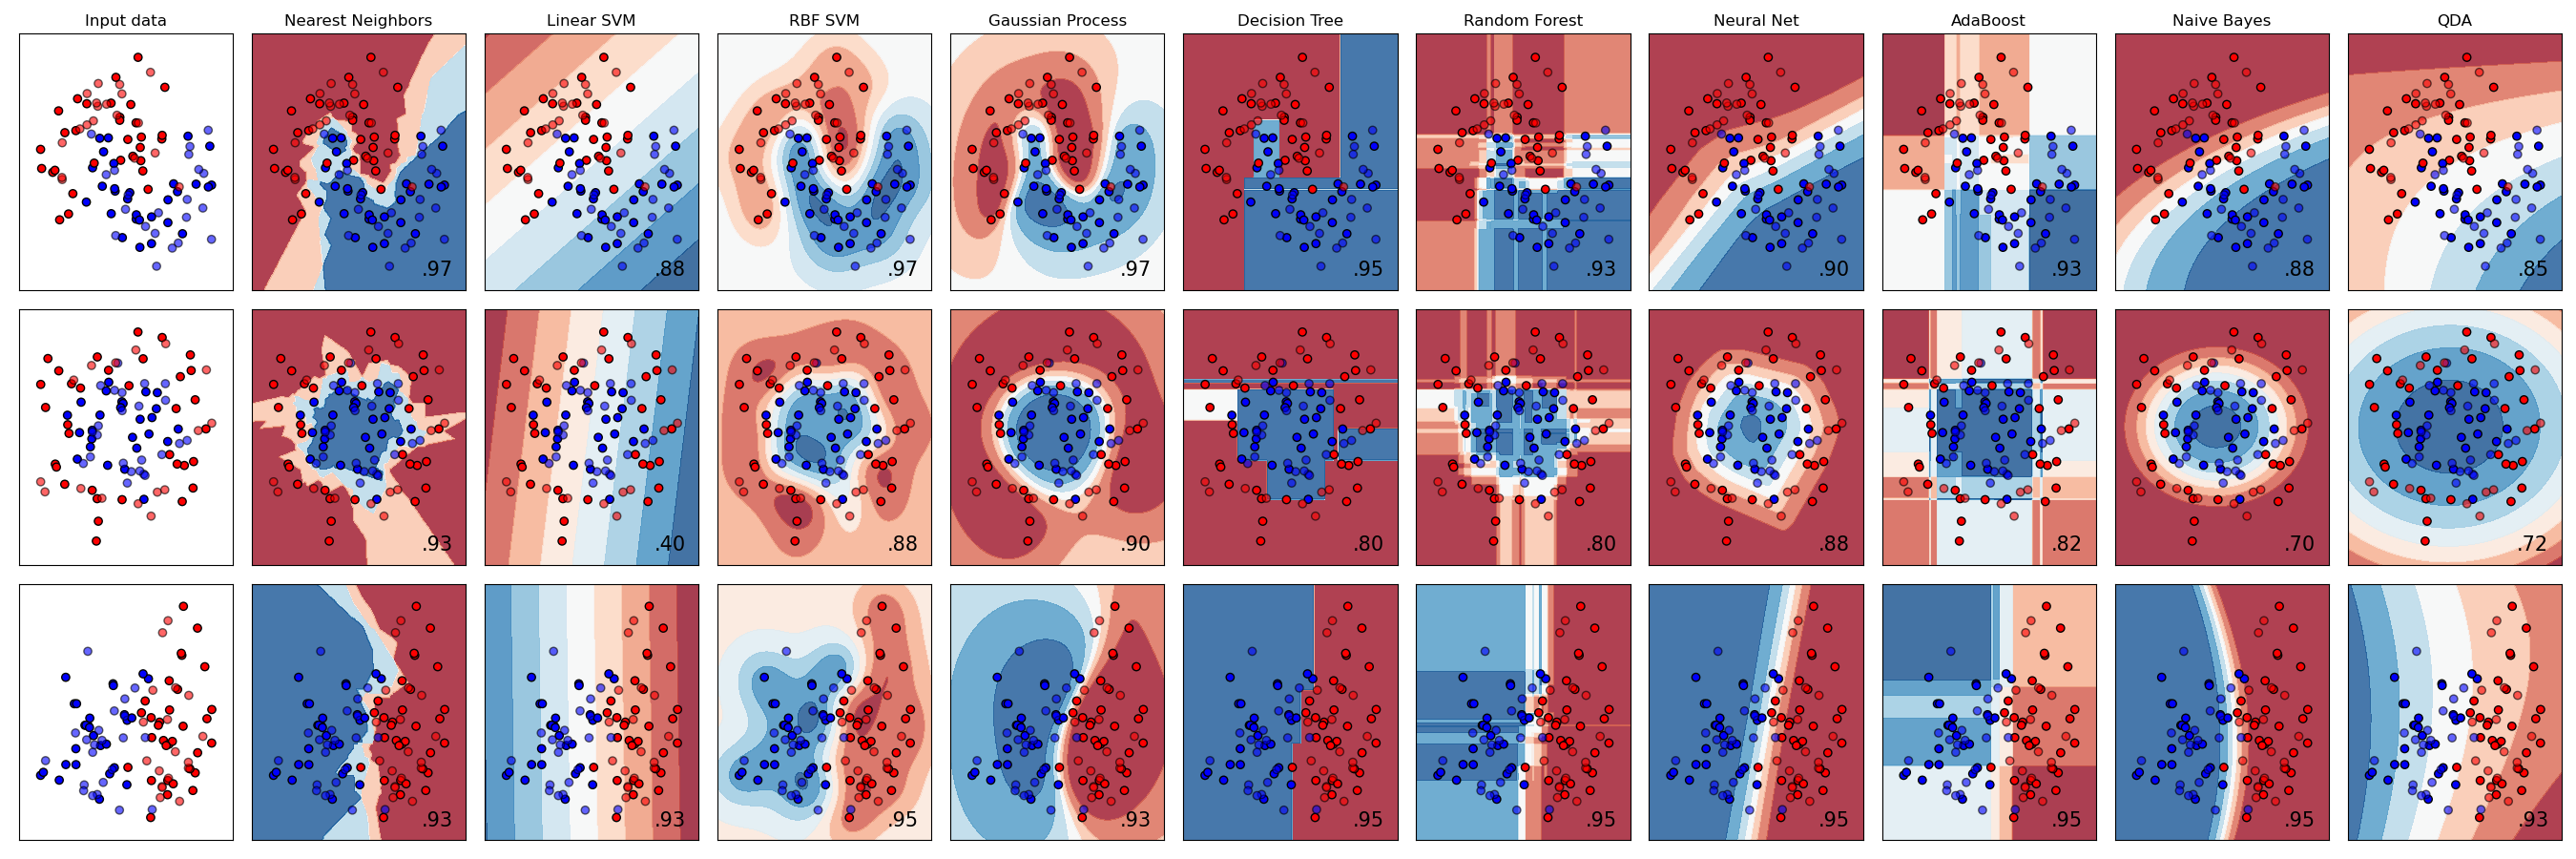

> Gráficos generados en la documentación de Scikit-learn

> AutoML resuelve este problema de forma pulcra al ejecutar estas comparaciones en la nube, permitiéndote elegir el mejor algoritmo para tus datos. Pruébalo [aquí](https://docs.microsoft.com/learn/modules/automate-model-selection-with-azure-automl/?WT.mc_id=academic-77952-leestott)

### Un mejor enfoque
Una mejor forma a estar adivinando, es seguir las ideas de esta [hoja de trucos de ML](https://docs.microsoft.com/azure/machine-learning/algorithm-cheat-sheet?WT.mc_id=academic-77952-leestott). Aquí, descubrimos que, para nuestro problema multiclase, tenemos algunas opciones:

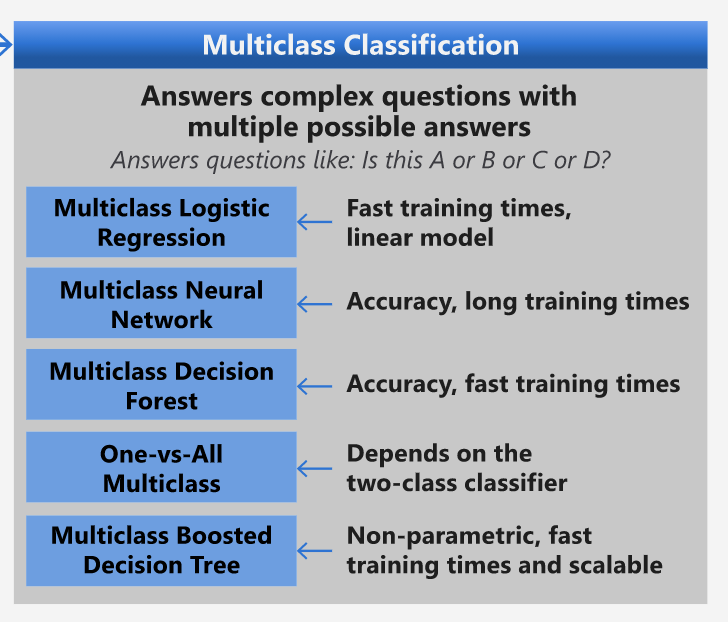


### Razonamiento
Veamos si podemos razonar nuestro camino a través de diferentes enfoques dadas las restricciones que tenemos:

* Las redes neuronales son muy pesadas. Dado nuestro conjunto de datos limpio aunque mínimo, y el hecho que estamos ejecutando el entrenamiento de forma local vía los notebooks, las redes neuronales son demasiado pesadas para esta tarea.
* Sin clasificador de dos clases. No usamos clasificador de dos clases, por lo que descarta un uno-contra-todos.
* El árbol de decisión o la regresión logística podría funcionar. Un árbol de decisión podría funcionar, o la regresión logística para datos multiclase.
* Los árboles de decisión potenciados multiclase resuelven un problema diferente. El árbol de decisión potenciado multiclase es el más adecuado para tareas no paramétricas, por ejemplo, las tareas designadas para construir clasificaciones, por lo que no es útil para nosotros.

## Usando Scikit-learn
Usaremos Scikit-learn para analizar nuestros datos. Sin embargo, hay varias formas de usar la regresión logística en Scikit-learn. Da un vistazo a los parámetros a pasar.

En esencia, hay dos parámetros importantes - multi_class y solver - que necesitamos especificar, cuando le pedimos a Scikit-learn realice una regresión logística. El valor multi_class aplica cierto comportamiento. El valor del solucionador (solver) es el algoritmo a usar. No todos los solucionadores pueden ser emparejados con todos los valores multi_class.

De acuerdo a la documentación, en el caso multiclase, el algoritmo de entrenamiento:

Usa el esquema uno contra el resto (OvsR), si la opción multi_class se configura a ovr
Usa la pérdida de entropía cruzada, si la opción multi_class se configura a multinomial (Actualmente la opción multinomial es soportada sólo por los solucionadores ‘lbfgs’, ‘sag’, ‘saga’ y ‘newton-cg’.).

Scikit-learn ofrece esta tabla para explicar como los solucionadores manejan distintos desafíos presentados por distintas clases de datos estructurados:

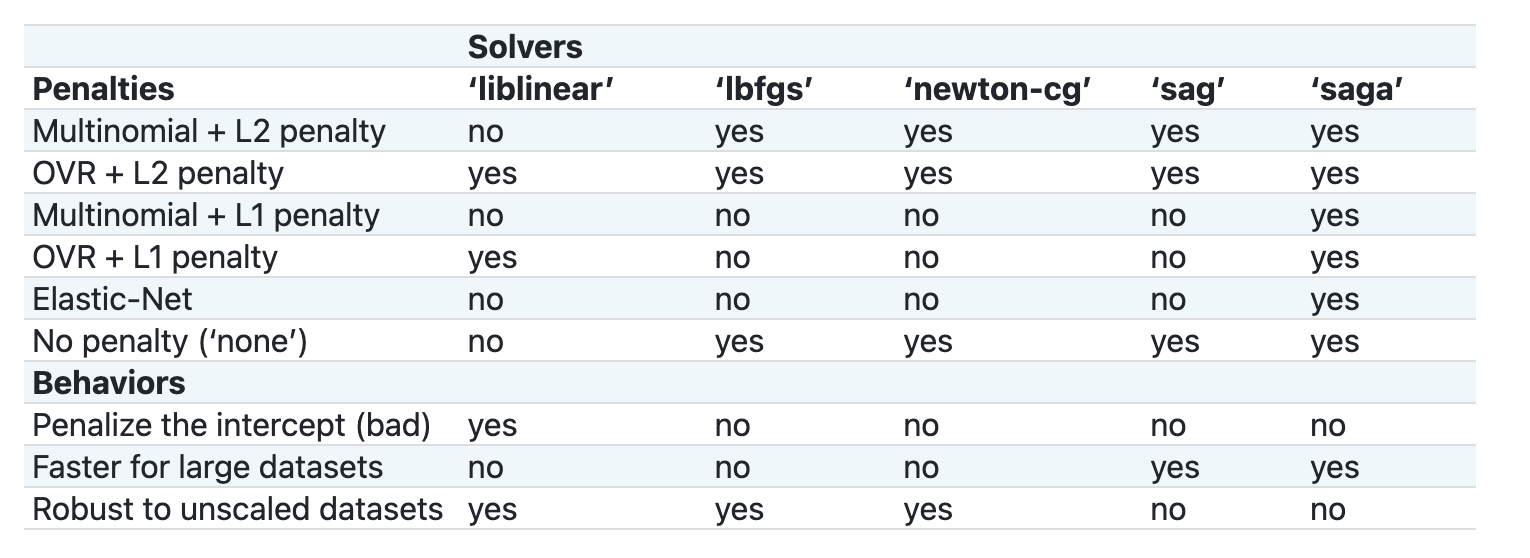

### Ejercicio - divide los datos
Nos podemos enfocar en la regresión logística para nuestra primer prueba de entrenamiento ya que recién aprendiste sobre esto último en la lección anterior. Divide tus datos en los grupos 'training' y 'testing' al llamar a train_test_split():

In [5]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

### Ejercicio - aplica la regresión logística
Ya que estás usando un caso multiclase, necesitas elegir qué esquema usar y qué solucionador configurar. Usa LogisticRegression con un ajuste multiclase y el solucionador liblinear para entrenar.

1. Crea un regresión logística con un multi_class configurado a ovr y el solucionador ajustado a liblinear:

In [6]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

Accuracy is 0.7981651376146789


2. Puedes ver este modelo en acción al probar una fila de datos (#50):

In [7]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

ingredients: Index(['beef', 'black_pepper', 'nira', 'onion', 'oyster', 'pea', 'sake',
       'scallion', 'sesame_oil', 'shiitake', 'shrimp', 'soy_sauce', 'starch',
       'vegetable', 'vegetable_oil'],
      dtype='object')
cuisine: chinese


3. Indagando más, puedes revisar la precisión de esta predicción:

In [8]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
chinese,0.638670
korean,0.358854
japanese,0.002448
indian,0.000025
thai,0.000004


4. Obtén mayor detalle al imprimir un reporte de clasificación, como lo hiciste en las lecciones de regresión:

In [9]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     chinese       0.71      0.71      0.71       238
      indian       0.92      0.90      0.91       234
    japanese       0.73      0.79      0.76       228
      korean       0.86      0.78      0.82       261
        thai       0.78      0.82      0.80       238

    accuracy                           0.80      1199
   macro avg       0.80      0.80      0.80      1199
weighted avg       0.80      0.80      0.80      1199



## Conclusión

En esta lección, se usaron los datos limpios para construir un modelo de aprendizaje automático que puede predecir una cocina nacional basado en una serie de ingredientes. 